Noelia Collado Gisbert

**TAREA 1 BIOINFORMÁTICA**

**INTRODUCCIÓN**

En el estudio realizado por Viscardi et al. (2021), quisieron estudiar el orígen de la sinapsis, y cómo evolucionó este sistema hasta la complejidad que tiene hoy en día. Para ello, estudiaron algunos de los receptores de neurotransmisores en vertebrados (venimos de los cordados). A continuación vamos a describir algunos de los que vamos a utilizar en este análisis: 

Por una parte, tenemos la proteína humana CHRM1, que es un receptor muscarínico de acetilcolina. Por otra parte, tenemos las proteínas CHRNA3 y CHRNA7, que son dos subunidades parálogas de receptor nicotínico de acetilcolina (al ser parálogas, quiere decir que en un momento dado de la evolución, el gen de la proteína ancestral se duplicó y surgieron estas dos). 

Viscardi et al. (2021) proponen que estas proteínas aparecieron en el último ancestro común entre cordados y cnidarios. Es decir, que no existen proteínas homólogas en linajes animales anteriores a este ancestro común, como ctenóforos (animales marinos diblásticos), poríferos (esponjas de mar), placozoa (animales un poco más complejos que los protozoos), y menos aún en hongos o plantas, que son anteriores. 

El objetivo de este estudio es realizar un análisis para confirmar que no existen proteínas homólogas a estos receptores en linajes anteriores a este último ancestro común entre cordados y cnidarios y que por tanto, el origen de la sinapsis se situaría en este último ancestro. 

**MÉTODOS**

La base de datos de secuencias proteicas que vamos a utilizar va a ser Swissprot, ya instalada localmente en este ambiente.
Vamos a usar el algoritmo BLAST (Altschul *et al*., 1990) , de alineamiento de secuencias. Hay que recordar siempre que BLAST es un algoritmo heurístico, es decir, siempre nos va a dar una solución, pero eso no implica que sea la correcta. 

Dentro de BLAST, utilizaré el programa blastp (Altschul *et al*., 1990), especializado para secuencias de porteínas. Lo usaré con diferentes umbrales de valor E, para determinar a qué ritmo aumenta la distribución taxonómica de las secuencias encontradas a medida que se relaja el grado de similitud exigido. Es decir, a medida que acepto como resultados del blastp secuencias con un valor E mayor.

Posteriormente para complementar el análisis, haré uso del PSI-BLAST (Altschul *et al*., 1997) y del paquete DECIPHER(Wright, 2016) para alinear secuencias. 

**PREPARACIÓN DEL AMBIENTE DE COMPUTACIÓN**

Para prepararlo, vamos a usar la función *system2* de R, la cual ejecuta los comandos que nosotros indicamos y se encuentran 
en el sistema.

1) Descomprimir el archivo taxdb.btd.gz.

In [1]:
system2(command = 'gzip', 
        args = c('-dk', 'taxdb.btd.gz'), 
        wait = TRUE, 
        stdout = TRUE)

character(0)

2. Instalar BLAST

In [2]:
system2(command = './preparar_ambiente.sh', wait = TRUE)

**RESULTADOS**

**Blastp individual**

Primero, ejecuto una única búsqueda con blastp para cada una de las proteínas: CHRM1, CHRNA3 y CHRNA7. Voy a empezar por un valor E de 0.001.

1) Proteína CHRM1

In [3]:
BlastpOut01 <- system2(command = 'blastp',
                       args = c('-db', 'swissprot',
                                '-query', 'CHRM1.fas',
                                '-evalue', '0.001',
                                '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                       stdout = TRUE)

TablaOut01 <- read.table(textConnection(BlastpOut01),
                         sep = '\t',
                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                       'qend', 'sstart', 'send', 'evalue', 'staxid',
                                       'ssciname', 'sblastname'))
TablaOut01

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P11229.2,100.000,460,1,460,1,460,0.00e+00,9606,Homo sapiens,primates
P56489.1,99.565,460,1,460,1,460,0.00e+00,9544,Macaca mulatta,primates
Q5R949.1,99.565,460,1,460,1,460,0.00e+00,9601,Pongo abelii,primates
P04761.1,99.130,460,1,460,1,460,0.00e+00,9823,Sus scrofa,even-toed ungulates
P12657.2,98.913,460,1,460,1,460,0.00e+00,10090,Mus musculus,rodents
P08482.1,98.696,460,1,460,1,460,0.00e+00,10116,Rattus norvegicus,rodents
Q9N2A4.1,51.731,520,10,438,51,564,1.14e-170,9598,Pan troglodytes,primates
P20309.1,51.731,520,10,438,51,564,2.19e-170,9606,Homo sapiens,primates
Q9N2A3.1,51.737,518,10,436,51,562,1.08e-169,9595,Gorilla gorilla gorilla,primates


Una vez ejecutado el blastp, para esta proteína CHRM1 y con un E de 0.001, ha encontrado 703 secuencias.

2) Proteína CHRNA3

In [4]:
BlastpOut02 <- system2(command = 'blastp',
                       args = c('-db', 'swissprot',
                                '-query', 'CHRNA3.fas',
                                '-evalue', '0.001',
                                '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                       stdout = TRUE)

TablaOut02 <- read.table(textConnection(BlastpOut02),
                         sep = '\t',
                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                       'qend', 'sstart', 'send', 'evalue', 'staxid',
                                       'ssciname', 'sblastname'))
TablaOut02

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>
P32297.4,100.000,505,1,505,1,505,0.00e+00,9606,Homo sapiens,primates
Q07263.1,95.825,479,27,505,17,495,0.00e+00,9913,Bos taurus,even-toed ungulates
Q8R4G9.1,92.886,492,14,505,8,499,0.00e+00,10090,Mus musculus,rodents
P04757.1,92.308,494,12,505,6,499,0.00e+00,10116,Rattus norvegicus,rodents
P09481.2,85.232,474,31,504,22,495,0.00e+00,9031,Gallus gallus,birds
P18845.1,68.885,511,13,501,3,509,0.00e+00,7957,Carassius auratus,bony fishes
P49581.1,65.145,482,20,501,19,492,0.00e+00,9031,Gallus gallus,birds
Q15825.1,67.653,473,34,501,33,489,0.00e+00,9606,Homo sapiens,primates
Q5IS76.1,67.442,473,34,501,33,489,0.00e+00,9598,Pan troglodytes,primates


Una vez ejecutado el blastp, para esta proteína CHRNA3 y con un E de 0.001, ha encontrado 254 secuencias.

3. Proteína CHRNA7

In [5]:
BlastpOut03 <- system2(command = 'blastp',
                       args = c('-db', 'swissprot',
                                '-query', 'CHRNA7.fas',
                                '-evalue', '0.001',
                                '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                       stdout = TRUE)

TablaOut03 <- read.table(textConnection(BlastpOut03),
                         sep = '\t',
                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                       'qend', 'sstart', 'send', 'evalue', 'staxid',
                                       'ssciname', 'sblastname'))
TablaOut03

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>
P36544.5,100.000,502,1,502,1,502,0.00e+00,9606,Homo sapiens,primates
Q866A2.1,99.004,502,1,502,1,502,0.00e+00,9544,Macaca mulatta,primates
P54131.1,94.567,497,6,502,3,499,0.00e+00,9913,Bos taurus,even-toed ungulates
Q05941.2,93.964,497,6,502,6,502,0.00e+00,10116,Rattus norvegicus,rodents
P49582.1,93.964,497,6,502,6,502,0.00e+00,10090,Mus musculus,rodents
P22770.1,92.133,483,20,502,20,502,0.00e+00,9031,Gallus gallus,birds
Q494W8.1,100.000,385,118,502,28,412,0.00e+00,9606,Homo sapiens,primates
P48180.1,44.919,492,10,494,6,497,4.41e-145,6239,Caenorhabditis elegans,nematodes
A8WQK3.2,44.732,503,10,494,7,498,7.60e-145,6238,Caenorhabditis briggsae,nematodes


Una vez ejecutado el blastp, para esta proteína CHRNA7 y con un E de 0.001, ha encontrado 249 secuencias.

En los blastp ejecutados para cada proteína se han encontrado muchas secuencias:
- 703 secuencias homólogas a CHRM1
- 254 secuencias homólogas a CHRNA3
- 249 secuencias homólogas a CHRNA7

Son muchas secuencias. No obstante, el número se irá reduciendo a medida que aumentemos el valor E y por tanto, la
significancia de las secuencias encontradas.

**Blastp en serie**

Para ver cómo disminuye el número de secuencias a medida que disminuye el valor E, vamos a repetir la búsqueda de cada proteína, unas cuantas veces pero con valores E distintos (cada vez más pequeños).

Primero, vamos a crear un vector donde estén todos los valores E que queramos aplicar. Van a ir de mayor a menor, y empezaremos por 1e-03, que equivale al 0.001 utilizado en el apartado anterior.

In [7]:
Valores_E <- c('1.0e-03', '1.0e-06', '1.0e-09', '1.0e-15', '1.0e-30', '1.0e-60')

Para automatizar el proceso, vamos a usar la función *lapply*, la cual va a aplicar la función *systsem2* (que ejecutaba el comando blastp para la proteína que especifiquemos) a cada uno de los valores E contenidos en e vector anterior. El resultado será una lista de tablas.

1. Proteína CHRM1

In [8]:
Lista_de_Tablas_CHRM1 <- lapply(Valores_E,
                          function(x) {
                            BlastpOut1 <- system2(
                              command = 'blastp',
                              args = c('-db', 'swissprot',
                                       '-query', 'CHRM1.fas',
                                       '-evalue', x,
                                       '-outfmt',
                                       '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                              stdout = TRUE)
                            read.table(textConnection(BlastpOut1),
                                       sep = '\t',
                                       col.names = c('saccver', 'pident', 'length', 'qstart',
                                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                                     'ssciname', 'sblastname'))
                          })

2. Proteína CHRNA3

In [9]:
Lista_de_Tablas_CHRNA3 <- lapply(Valores_E,
                                function(x) {
                                  BlastpOut2 <- system2(
                                    command = 'blastp',
                                    args = c('-db', 'swissprot',
                                             '-query', 'CHRNA3.fas',
                                             '-evalue', x,
                                             '-outfmt',
                                             '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                    stdout = TRUE)
                                  read.table(textConnection(BlastpOut2),
                                             sep = '\t',
                                             col.names = c('saccver', 'pident', 'length', 'qstart',
                                                           'qend', 'sstart', 'send', 'evalue', 'staxid',
                                                           'ssciname', 'sblastname'))
                                })

3. Proteína CHRNA7

In [10]:
Lista_de_Tablas_CHRNA7 <- lapply(Valores_E,
                                 function(x) {
                                   BlastpOut3 <- system2(
                                     command = 'blastp',
                                     args = c('-db', 'swissprot',
                                              '-query', 'CHRNA7.fas',
                                              '-evalue', x,
                                              '-outfmt',
                                              '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                     stdout = TRUE)
                                   read.table(textConnection(BlastpOut3),
                                              sep = '\t',
                                              col.names = c('saccver', 'pident', 'length', 'qstart',
                                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                                            'ssciname', 'sblastname'))
                                 })

Ahora vamos a ver cuántas secuencias ha encontrado blastp para cada valor de E. Tendríamos que aplicar la función *dim* a cada
tabla de una Lista_de_tablas de cada proteína. Para ello usamos la función sapply, que aplica la función *dim* a cada elemento de la Lista_de tablas. Así nos dará el número de resultados para cada E de nuestro vector Valores_E.

Posteriormente, representaremos el número de resultados en función de los valores de E.

Esto lo haremos para cada una de las proteínas.

1. Proteína CHRM1

In [11]:
Numero_de_resultados_CHRM1 <- sapply(Lista_de_Tablas_CHRM1, function(x) dim(x)[1])
Numero_de_resultados_CHRM1

[1] 703 647 543 305  94  34

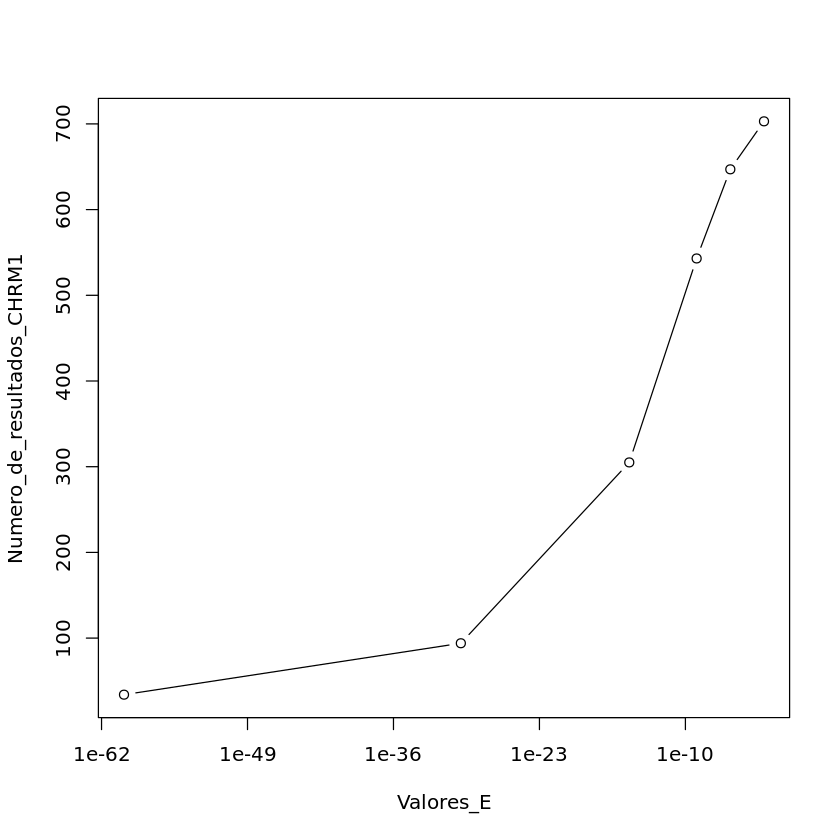

In [12]:
plot(Valores_E, Numero_de_resultados_CHRM1, log = 'x', type = 'b')

2. Proteína CHRNA3

In [13]:
Numero_de_resultados_CHRNA3 <- sapply(Lista_de_Tablas_CHRNA3, function(x) dim(x)[1])
Numero_de_resultados_CHRNA3

[1] 254 234 193 146 130 114

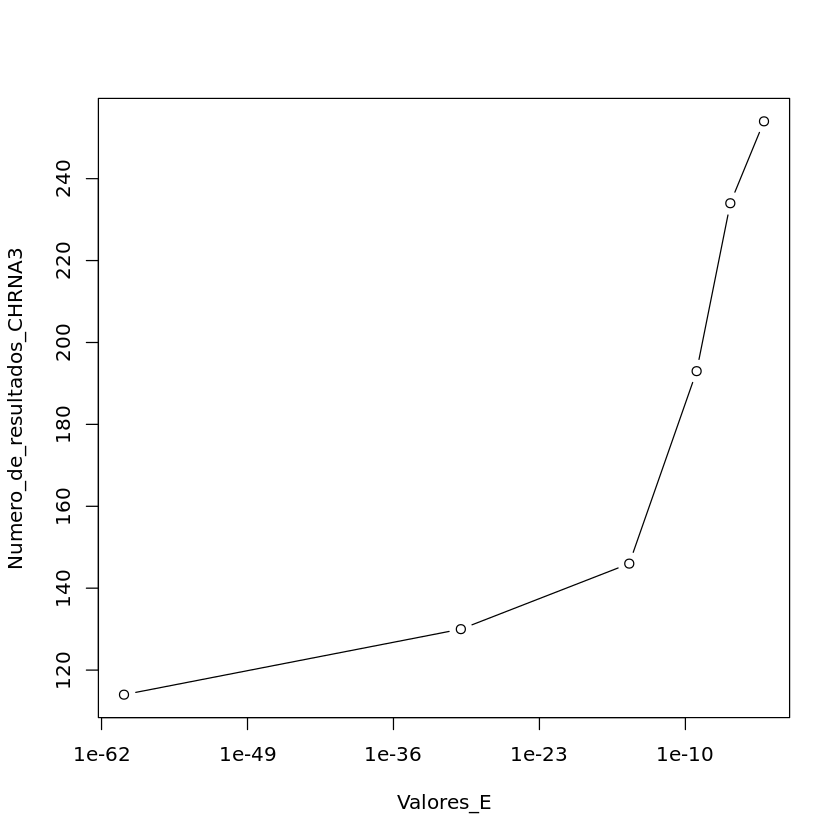

In [14]:
plot(Valores_E, Numero_de_resultados_CHRNA3, log = 'x', type = 'b')

3. Proteína CHRNA7

In [15]:
Numero_de_resultados_CHRNA7 <- sapply(Lista_de_Tablas_CHRNA7, function(x) dim(x)[1])
Numero_de_resultados_CHRNA7

[1] 249 191 167 131 129 113

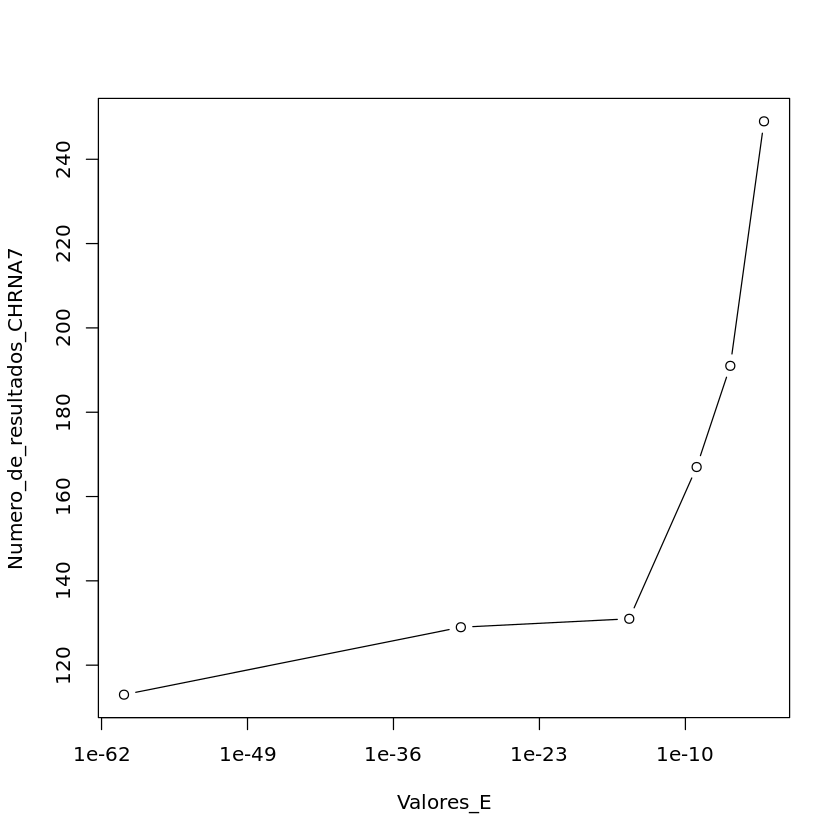

In [16]:
plot(Valores_E, Numero_de_resultados_CHRNA7, log = 'x', type = 'b')

Como vemos en las gráficas, conforme aumenta el valor E, también lo hace el número de secuencias encontradas. Por lo que a mayor valor de E, menos exigentes estamos siendo.  

Ahora vamos a representar la longitud del alineamiento con respecto a el valor E. Para ello, para cada proteína, vamos a usar la primera tabla de su Lista_de_Tablas, que era la que tenía el valor E más alto, y por tanto más secuencias.

1. Proteína CHRM1

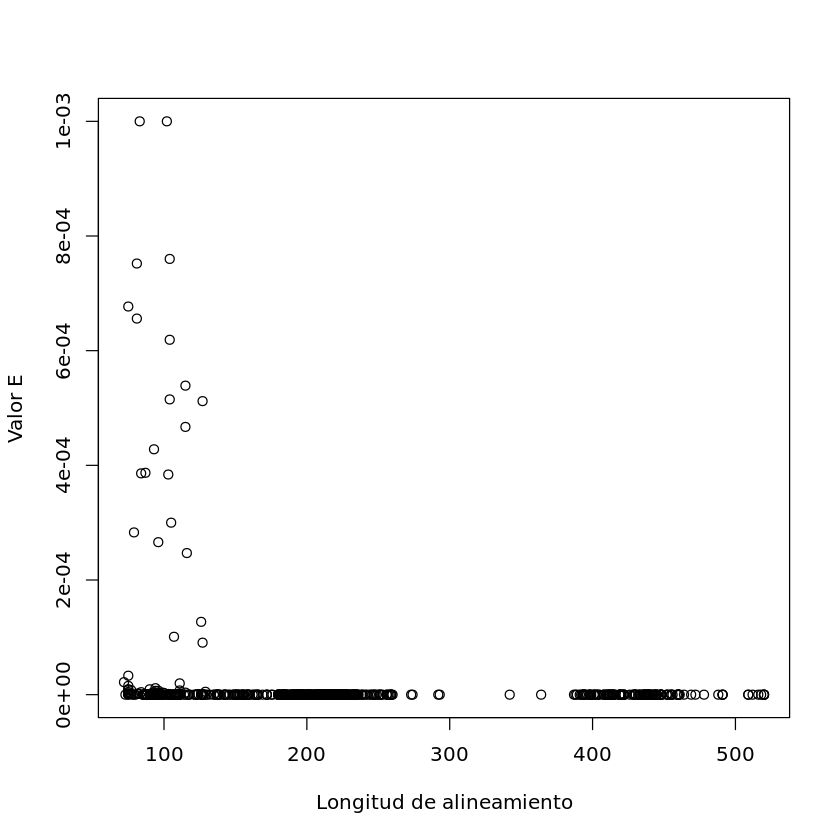

In [17]:
plot(Lista_de_Tablas_CHRM1[[1]]$length, Lista_de_Tablas_CHRM1[[1]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

2. Proteína CHRNA3

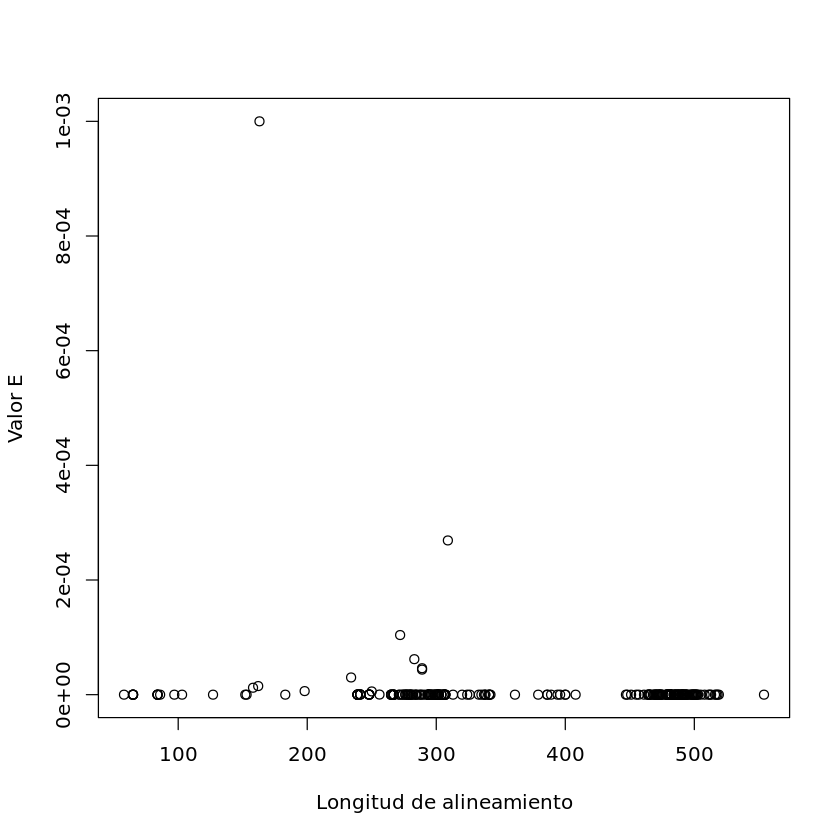

In [18]:
plot(Lista_de_Tablas_CHRNA3[[1]]$length, Lista_de_Tablas_CHRNA3[[1]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

3. Proteína CHRNA7

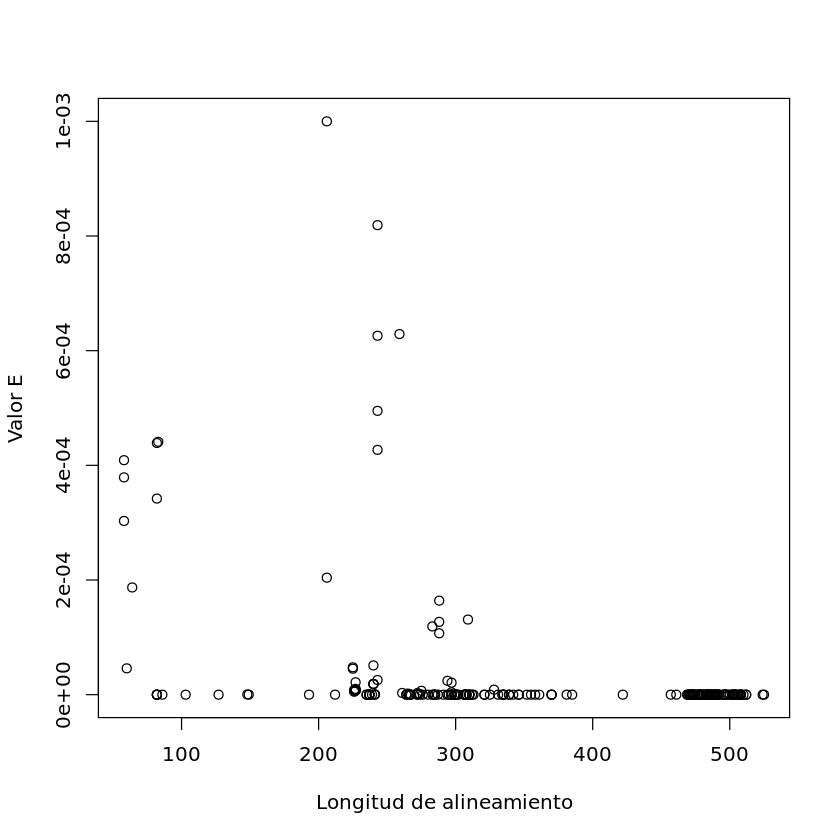

In [19]:
plot(Lista_de_Tablas_CHRNA7[[1]]$length, Lista_de_Tablas_CHRNA7[[1]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

Las longitudes de las proteínas son:
- CHRM1: 460 aminoácidos.
- CHRNA3: 505 aminoácidos.
- CHRNA7: 502 aminoácidos.

Como vemos en las gráficas, para cada proteína, hay alineamientos de menos longitud que su secuencia. Esto quiere decir que hay proteínas con homología parcial a cada una de las 3 que estamos estudiando. Ahora tenemos que ver si esas homologías parciales son importantes o no. Es decir, tenemos que ver ahora qué posiciones de cada proteína participan en los alineamientos parciales y ver si esa zona es importante, tiene posiciones conservadas, o no. 

Para representar esto, primero hay que hacer una gráfica pero sin los alineamientos, para la cual determinamos el valor máximo de *qend* para que sea el valor máximo en el eje X. Este valor lo obtendremos de la primera tabla, donde están todas las secuencias. Luego sobre este gráfico, con la función *segments*, añadiremos el inicio y el final de cada secuencia. Representaremos la posición de las secuencias en función del valor E, y nos darán las zonas de homologías.

Esto lo haremos para cada proteína.

1. Proteína CHRM1

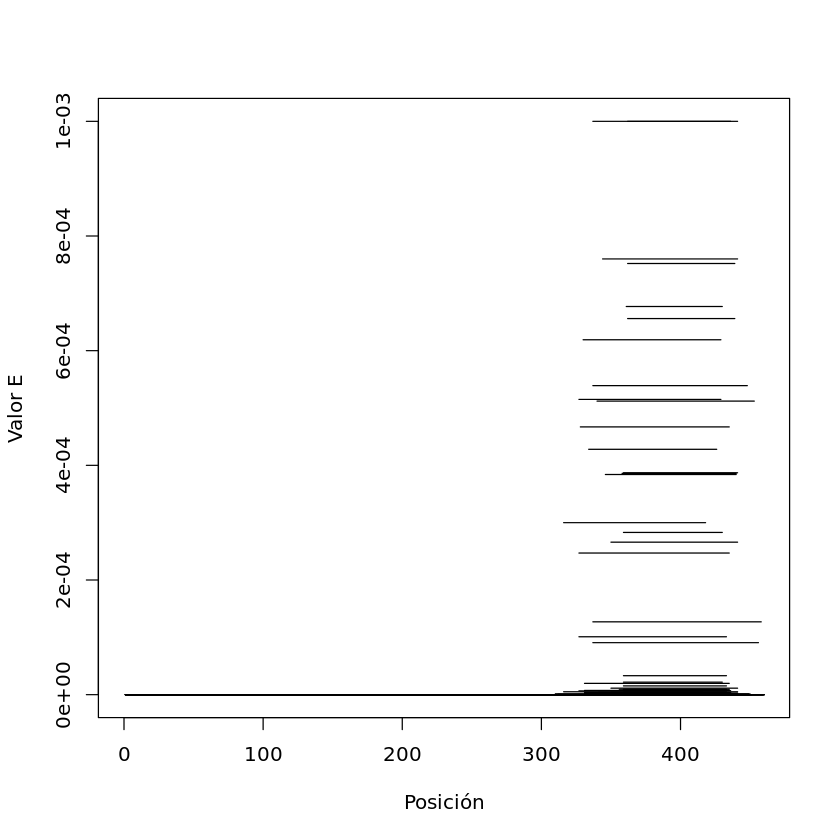

In [20]:
inicios1 <- Lista_de_Tablas_CHRM1[[1]]$qstart
finales1 <- Lista_de_Tablas_CHRM1[[1]]$qend
valoresE1 <- Lista_de_Tablas_CHRM1[[1]]$evalue

AlineamientoMaximoCHRM1 <- max(Lista_de_Tablas_CHRM1[[1]]$qend)
plot(c(0, AlineamientoMaximoCHRM1), range(valoresE1), type='n', xlab='Posición', ylab='Valor E')

segments(inicios1, valoresE1, finales1, valoresE1)

2. Proteína CHRNA3

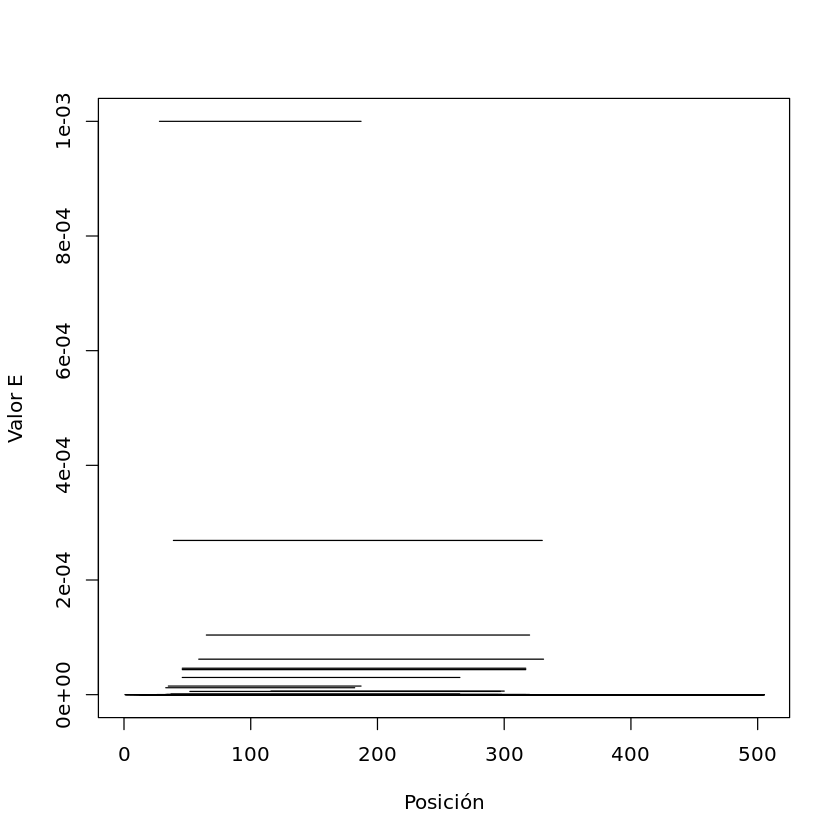

In [21]:
inicios2 <- Lista_de_Tablas_CHRNA3[[1]]$qstart
finales2 <- Lista_de_Tablas_CHRNA3[[1]]$qend
valoresE2 <- Lista_de_Tablas_CHRNA3[[1]]$evalue

AlineamientoMaximoCHRNA3 <- max(Lista_de_Tablas_CHRNA3[[1]]$qend)
plot(c(0, AlineamientoMaximoCHRNA3), range(valoresE2), type='n', xlab='Posición', ylab='Valor E')

segments(inicios2, valoresE2, finales2, valoresE2)

3. Proteína CHRNA7

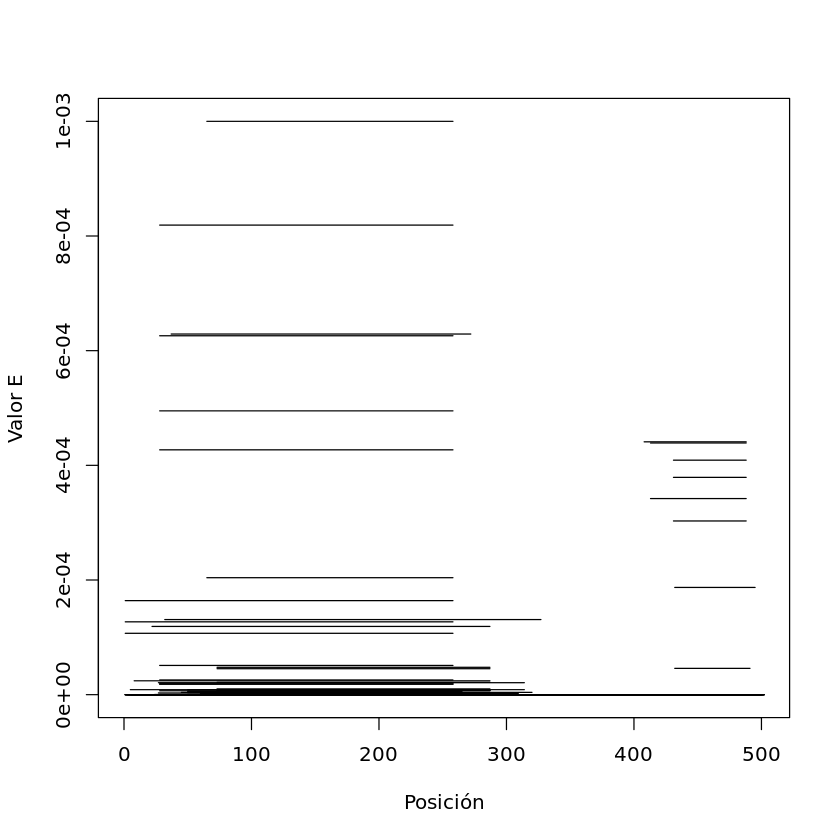

In [22]:
inicios3 <- Lista_de_Tablas_CHRNA7[[1]]$qstart
finales3 <- Lista_de_Tablas_CHRNA7[[1]]$qend
valoresE3 <- Lista_de_Tablas_CHRNA7[[1]]$evalue

AlineamientoMaximoCHRNA7 <- max(Lista_de_Tablas_CHRNA7[[1]]$qend)
plot(c(0, AlineamientoMaximoCHRNA7), range(valoresE3), type='n', xlab='Posición', ylab='Valor E')

segments(inicios3, valoresE3, finales3, valoresE3)

Después de ver dónde están las homologías en cada una de las proteínas, podemos ver que se concentran en zonas concretas:
- CHRM1: La mayoría están sobre las posiciones 320-450 aproximadamente.
- CHRNA3: La mayoría están sobre las posiciones 30-300 aproximadamente.
- CHRNA7: La mayoría están sobre las posiciones 0-300, y unos pocos entre 400-500 aproximadamente.

A continuación, vamos a ver a qué taxonomía pertenecen las secuencias homólogas. Para ello vamos a usar la columna *sblastname* de las tablas. Esta columna nos da el nombre del rango superior al que pertenece esa especie de esa secuencia. De esta forma, contando estos rangos superiores va a ser más fácil que contando todas las especies porque son muchísimas.

Para ello, vamos a aplicar la función *table* a cada columna *sblastname* de cada tabla de Lista_de_Tablas.

Esto lo realizaremos para cada una de las proteínas. 

1. Proteína CHRM1

In [23]:
lapply(Lista_de_Tablas_CHRM1, function(x) table(x$sblastname))

[[1]]

              birds            bivalves         bony fishes          carnivores 
                 12                   1                  32                  45 
        cephalopods         crustaceans even-toed ungulates               flies 
                  6                   3                  65                  30 
      frogs & toads          gastropods        grasshoppers        insectivores 
                 21                   9                   2                   2 
          lancelets             lizards          marsupials               moths 
                  2                   1                   7                   8 
          nematodes  odd-toed ungulates          placentals            primates 
                 15                   5                   7                 145 
    rabbits & hares             rodents             viruses 
                 15                 268                   2 

[[2]]

              birds            bivalves         bony 

2. Proteína CHRNA3

In [24]:
lapply(Lista_de_Tablas_CHRNA3, function(x) table(x$sblastname))

[[1]]

              birds         bony fishes          carnivores       cyanobacteria 
                 22                   8                   5                   1 
     enterobacteria even-toed ungulates               flies       frogs & toads 
                  1                  21                  11                   6 
         gastropods        grasshoppers        insectivores           mosquitos 
                  2                   1                   2                   1 
              moths                 N/A           nematodes            primates 
                  1                   1                  31                  55 
            rodents     sharks and rays              snakes 
                 78                   5                   2 

[[2]]

              birds         bony fishes          carnivores      enterobacteria 
                 22                   7                   5                   1 
even-toed ungulates               flies       frogs &

3. Proteína CHRNA7

In [25]:
lapply(Lista_de_Tablas_CHRNA7, function(x) table(x$sblastname))

[[1]]

              birds         bony fishes          carnivores       cyanobacteria 
                 22                   8                   5                   1 
     enterobacteria even-toed ungulates               flies       frogs & toads 
                  1                  19                  12                   6 
         gastropods        grasshoppers        insectivores               moths 
                  2                   2                   2                   1 
                N/A           nematodes            primates             rodents 
                  1                  28                  55                  77 
    sharks and rays              snakes 
                  5                   2 

[[2]]

              birds         bony fishes          carnivores even-toed ungulates 
                 17                   7                   4                  15 
              flies       frogs & toads          gastropods        grasshoppers 
            

En base a estos resultados, vemos como la mayoría son secuencias homólogas de cordados. Lo diferentes es:
- Para la proteína CHRM1, en la primera tabla hay dos secuencias homólogas que pertenecen a virus.
- Para la proteína CHRNA3, en la tabla 1 hay una secuencia homóloga que pertenece a una cianobacteria y otra que pertenece a una enterobacteria.
- Para la proteína CHRNA7 igual, hay una secuencia homóloga de una cianobacteria y otra de una enterobacteria.

Quitando de estas proteínas homólogas encontradas, las demás son todas de filos posteriores al ancestro común de humanos - cnidarios, que es lo que buscamos. Por lo que no tienen mucho interés. 

No obstante, como se encuentran en la primera tabla, su valor E era el más permisivo. Vamos a ver un poco más de qué secuencias se tratan.Para encontrarlas, las vamos a sacar cada una de la primera tabla de cada una de las proteínas:

1. Proteína CHRM1

In [26]:
tabla1CHRM1 <- Lista_de_Tablas_CHRM1[[1]]
tabla1CHRM1[tabla1CHRM1$sblastname=="viruses", ]

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
638,Q08520.1,26.697,221,2,212,41,249,3.69e-11,10277,Swinepox virus (STRAIN KASZA),viruses
699,Q86917.1,25.758,198,42,233,108,289,1.32e-09,10269,Sheeppox virus KS-1,viruses


2. Proteína CHRNA3

In [27]:
tabla1CHRNA3 <- Lista_de_Tablas_CHRNA3[[1]]
tabla1CHRNA3[tabla1CHRNA3$sblastname=="cyanobacteria", ]
tabla1CHRNA3[tabla1CHRNA3$sblastname=="enterobacteria", ]

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>
244,Q7NDN8.1,22,250,52,297,52,291,5.64e-06,251221,Gloeobacter violaceus PCC 7421,cyanobacteria


,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>
238,P0C7B7.1,22.656,256,52,295,2,253,2.11e-07,556,Dickeya chrysanthemi,enterobacteria


3. Proteína CHRNA7

In [28]:
tabla1CHRNA7 <- Lista_de_Tablas_CHRNA7[[1]]
tabla1CHRNA7[tabla1CHRNA7$sblastname=="cyanobacteria", ]
tabla1CHRNA7[tabla1CHRNA7$sblastname=="enterobacteria", ]

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>
203,Q7NDN8.1,21.786,280,43,320,52,320,3.44e-08,251221,Gloeobacter violaceus PCC 7421,cyanobacteria


,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>
218,P0C7B7.1,22.222,297,45,320,6,284,4.05e-06,556,Dickeya chrysanthemi,enterobacteria


Ya tenemos las proteínas encontradas. Vamos a hacer PSI-BLAST (Altschul *et al*., 1997) de cada proteína y ahí las vamos a buscar por su *saccver* en los html que generemos de cada PSI-BLAST.

In [29]:
system2(command = 'psiblast',
        args = c('-db', 'swissprot',
                 '-query', 'CHRM1.fas',
                 '-out', 'psiCHRM1.html',
                 '-evalue', '0.001',
                 '-inclusion_ethresh', '0.001',
                 '-num_iterations', '0', 
                 '-html'), 
        wait = TRUE, stdout = TRUE)

system2(command = 'psiblast',
        args = c('-db', 'swissprot',
                 '-query', 'CHRNA3.fas',
                 '-out', 'psiCHRNA3.html',
                 '-evalue', '0.001',
                 '-inclusion_ethresh', '0.001',
                 '-num_iterations', '0', 
                 '-html'), 
        wait = TRUE, stdout = TRUE)

system2(command = 'psiblast',
        args = c('-db', 'swissprot',
                 '-query', 'CHRNA7.fas',
                 '-out', 'psiCHRNA7.html',
                 '-evalue', '0.001',
                 '-inclusion_ethresh', '0.001',
                 '-num_iterations', '0', 
                 '-html'), 
        wait = TRUE, stdout = TRUE)

character(0)

character(0)

character(0)

Una vez hemos encontrado las proteínas que vamos a comparar con cada una de las tres que estamos estudiando, pinchamos en su *saccver* en el html generado del PSI-BLAST, y nos dirige a la página web del NCBI donde está esa proteína, y ahí podemos adquirir su secuencia en formato fasta. Estos documentos HTML se adjuntan en la tarea.

Lo que vamos a hacer ahora, va a ser generar documentos donde se encuentren las secuencias de las proteínas en formato fasta para poder alinearlas y compararlas. 

Voy a generar 3 documentos, los cuales estarán adjuntos en la entrega del trabajo:

- Documento_1.txt: Contiene la secuencia de CHRM1 y las dos proteínas homólogas en virus.
- Documento_2.txt: Contiene la secuencia de CHRNA3 y las dos proteínas homólogas, una de la cianobacteria y la otra de la enterobacteria.
- Documento_3.txt: Contiene la secuencia de CHRNA7 y las dos proteínas homólogas, una de la cianobacteria y la otra de la enterobacteria.

Para realizar el alineamiento de las proteínas, usaré el paquete DECIPHER(Wright, 2016)

In [30]:
suppressMessages(library('DECIPHER'))

secuenciasCHRM1 <- './Documento_1.txt'
secuenciasCHRNA3 <- './Documento_2.txt'
secuenciasCHRNA7 <- './Documento_3.txt'

secuencias_candidatas_CHRM1 <- readAAStringSet(secuenciasCHRM1)
secuencias_candidatas_CHRNA3 <- readAAStringSet(secuenciasCHRNA3)
secuencias_candidatas_CHRNA7 <- readAAStringSet(secuenciasCHRNA7)

secuencias_alineadas_CHRM1 <- AlignSeqs(secuencias_candidatas_CHRM1)
secuencias_alineadas_CHRNA3 <- AlignSeqs(secuencias_candidatas_CHRNA3)
secuencias_alineadas_CHRNA7 <- AlignSeqs(secuencias_candidatas_CHRNA7)


BrowseSeqs(secuencias_alineadas_CHRM1, htmlFile = "secuencias_alineadas_CHRM1.html")
BrowseSeqs(secuencias_alineadas_CHRNA3, htmlFile = "secuencias_alineadas_CHRNA3.html")
BrowseSeqs(secuencias_alineadas_CHRNA7, htmlFile = "secuencias_alineadas_CHRNA7.html")


Determining distance matrix based on shared 5-mers:

Time difference of 0.02 secs

Clustering into groups by similarity:

Time difference of 0.02 secs

Aligning Sequences:

Time difference of 0.12 secs

Iteration 1 of 2:

Determining distance matrix based on alignment:

Time difference of 0.01 secs

Reclustering into groups by similarity:

Time difference of 0.05 secs

Realigning Sequences:

Time difference of 0.02 secs

Alignment converged - skipping remaining iteration.

Determining distance matrix based on shared 5-mers:

Time difference of 0.01 secs

Clustering into groups by similarity:

Time difference of 0.01 secs

Aligning Sequences:

Time difference of 0.1 secs

Iteration 1 of 2:

Determining distance matrix based on alignment:

Time difference of 0.01 secs

Reclustering into groups by similarity:

Time difference of 0.04 secs

Realigning Sequences:

Time difference of 0.01 secs

Alignment converged - skipping remaining iteration.

Refining the alignment:

Time difference of 0

Los resultados de estos alineamientos muestran que no es que haya un alineamiento importante y coincidente entre las proteínas que estamos estudiando y las homólogas que hemos comparado.

**CONCLUSIÓN**

Hemos intentado encontrar proteínas homólogas a las estudiadas (CHRM1, CHRNA3 y CHRN7) en linajes anteriores al ancestro común entre humanos y cnidarios para ver si habían indicios de que hubiese habido sinapsis. Las únicas secuencias en linajes no posteriores que habíamos encontrado, eran en virus, bacterias y cianobacterias. No obstante, estas secuencias fueron encontradas en la primera o las primeras tablas generadas con valores E poco exigentes, por lo que no es fiable del todo. 

* Proteína CHRM1: Encontramos proteínas de dos virus. Ambas proteínas, con los identificadores Q08520.1 y Q86917.1, son proteínas que parece tener la función de receptor de quimiocinas y transmiten la señal a las proteínas G. Como podemos ver en el alineamiento realizado, no hay homología más allá de unos pocos 3 aminoácidos seguidos. Bloques de 3 aminoácidos alineados correctamente solo vemos como mucho 3.

* Proteínas CHRNA3 y CHRNA7: Encontramos dos proteínas, una correspondiente a una cianobacteria, y otra a una enterobacteria. La proteína de cianobacteria, con identificador Q7NDN8.1, es un canal iónico con permeabilidades parecidas tanto al K+ como al Na+. Y la proteína de enterobacteria, con identificador P0C7B7.1, se trata de otro canal iónico. Tiene sentido que en ambas porteínas CHRNA3 y CHRNA7 se encuentren las mismas proteínas homólogas, ya que como recordamos estas dos proteínas eran parálogas. Al  ver el alineamiento vemos como pasa prácticamente igual, no hay casi bloques pequeños con el mismo alineamiento más allá de alguno con 3 aminoácidos seguidos. 

Con todos estos resultados, podríamos concluir lo siguiente: efectivamente, no existen proteínas homólogas ni a CHRM1, ni a CHRNA3 ni CHRNA7, en linajes anteriores al ancestro común entre humanos y cnidarios, como por ejemplo poríferos, ctenóforos, o incluso anteriores. Esto nos puede confirmar que la sinapsis tuvo lugar por primera vez en este ancestro común del que estamos hablando.

**REFERENCIAS**

- Lucas Henriques Viscardi, Danilo Oliveira Imparato, Maria Cátira Bortolini, Rodrigo Juliani Siqueira
Dalmolin, Ionotropic Receptors as a Driving Force behind Human Synapse Establishment, Molecular
Biology and Evolution, Volume 38, Issue 3, March 2021, Pages 735–744, doi:10.1093/molbev/msaa252.
- Altschul SF, Gish W, Miller W, Myers EW, Lipman DJ. Basic local alignment search tool. J Mol Biol. 1990 Oct 5;215(3):403-10. doi: 10.1016/S0022-2836(05)80360-2. PMID: 2231712.
- Altschul SF, Madden TL, Schäffer AA, Zhang J, Zhang Z, Miller W, Lipman DJ. Gapped BLAST and PSI-BLAST: a new generation of protein database search programs. Nucleic Acids Res. 1997 Sep 1;25(17):3389-402. doi: 10.1093/nar/25.17.3389. PMID: 9254694; PMCID: PMC146917.
- Wright ES (2016). “Using DECIPHER v2.0 to Analyze Big Biological Sequence Data in R.” The R Journal, 8(1), 352-359.